In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("Adult Census Income.csv")

In [3]:
data.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
data.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [5]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
data.columns = data.columns.str.strip()
data = data.drop(['fnlwgt', 'education-num'], axis=1)

(array([24720.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  7841.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

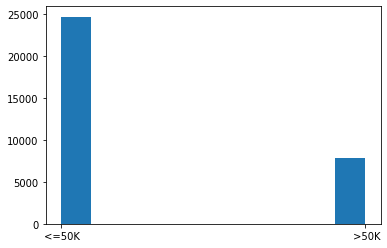

In [7]:
plt.hist(data.income)

In [8]:
data.isnull().sum()

age               0
workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [9]:
column_list = data.columns.values.tolist()

column_list = [x for x in column_list if data[x].dtype=='object' and x!='income']

for col in column_list:
    print("%s : %s" % (col, data[col].nunique()))

workclass : 9
education : 16
marital-status : 7
occupation : 15
relationship : 6
race : 5
sex : 2
native-country : 42


In [10]:
data[column_list] = data[column_list].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             32561 non-null  int64   
 1   workclass       32561 non-null  category
 2   education       32561 non-null  category
 3   marital-status  32561 non-null  category
 4   occupation      32561 non-null  category
 5   relationship    32561 non-null  category
 6   race            32561 non-null  category
 7   sex             32561 non-null  category
 8   capital-gain    32561 non-null  int64   
 9   capital-loss    32561 non-null  int64   
 10  hours-per-week  32561 non-null  int64   
 11  native-country  32561 non-null  category
 12  income          32561 non-null  object  
dtypes: category(8), int64(4), object(1)
memory usage: 1.5+ MB


In [11]:
data_copy = data.copy()
data.income.value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder

for col in column_list:
    data_copy[col] = LabelEncoder().fit_transform(data_copy[col])

data_copy.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,7,9,4,1,1,4,1,2174,0,40,39,<=50K
1,50,6,9,2,4,0,4,1,0,0,13,39,<=50K
2,38,4,11,0,6,1,4,1,0,0,40,39,<=50K
3,53,4,1,2,6,0,2,1,0,0,40,39,<=50K
4,28,4,9,2,10,5,2,0,0,0,40,5,<=50K


In [13]:
X = data_copy.drop(['income'], axis=1)
y = data_copy.income
y.value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [28]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)


def model_metrics(model, x_train, x_test, y_train, y_test):
    print("Classification Report: \n", metrics.classification_report(y_test, model.predict(x_test)))
    print("Accuracy Score: ", metrics.accuracy_score(y_test, model.predict(x_test)))
    print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, model.predict(x_test)))

model_metrics(model, x_train, x_test, y_train, y_test)


Classification Report: 
               precision    recall  f1-score   support

       <=50K       0.88      0.88      0.88      7455
        >50K       0.61      0.63      0.62      2314

    accuracy                           0.82      9769
   macro avg       0.75      0.75      0.75      9769
weighted avg       0.82      0.82      0.82      9769

Accuracy Score:  0.8169720544579793
Confusion Matrix: 
 [[6532  923]
 [ 865 1449]]


In [27]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

In [29]:
x_train_sm, x_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm, test_size=0.25, random_state=42, stratify=y_sm)

model = DecisionTreeClassifier()
model.fit(x_train_sm, y_train_sm)

model_metrics(model, x_train_sm, x_test_sm, y_train_sm, y_test_sm)

Classification Report: 
               precision    recall  f1-score   support

       <=50K       0.87      0.83      0.85      6180
        >50K       0.84      0.87      0.86      6180

    accuracy                           0.85     12360
   macro avg       0.85      0.85      0.85     12360
weighted avg       0.85      0.85      0.85     12360

Accuracy Score:  0.8529126213592233
Confusion Matrix: 
 [[5160 1020]
 [ 798 5382]]


In [50]:
from sklearn import model_selection

model = DecisionTreeClassifier()
params = {
    'max_depth': np.arange(1,500, 50),
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

model = model_selection.GridSearchCV(
    estimator = model,
    param_grid = params, 
    cv=10, 
    scoring='accuracy',
    n_jobs = -1
    )

model.fit(x_train_sm, y_train_sm)

print(model.best_score_)
print(model.best_estimator_.get_params())

0.8488942826321468
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 201, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 10, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


In [40]:
model = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=20, min_samples_split=2, 
min_samples_leaf=5, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, 
min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)

model.fit(x_train_sm, y_train_sm)
model_metrics(model, x_train_sm, x_test_sm, y_train_sm, y_test_sm)

Classification Report: 
               precision    recall  f1-score   support

       <=50K       0.86      0.84      0.85      6180
        >50K       0.84      0.87      0.85      6180

    accuracy                           0.85     12360
   macro avg       0.85      0.85      0.85     12360
weighted avg       0.85      0.85      0.85     12360

Accuracy Score:  0.8516181229773463
Confusion Matrix: 
 [[5175 1005]
 [ 829 5351]]


In [42]:
model = DecisionTreeClassifier()
params = {
    #'n_estimators': np.arange(100, 1500, 100),
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

model = model_selection.RandomizedSearchCV(
    estimator = model,
    param_distributions=params,
    n_iter=10,
    verbose=10, 
    cv=10, 
    scoring='accuracy',
    n_jobs = -1
    )

model.fit(x_train_sm, y_train_sm)

print(model.best_score_)
print(model.best_estimator_.get_params())

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10; 1/10] START criterion=entropy, max_depth=2, min_samples_leaf=100......
[CV 4/10; 1/10] START criterion=entropy, max_depth=2, min_samples_leaf=100......
[CV 8/10; 1/10] START criterion=entropy, max_depth=2, min_samples_leaf=100......
[CV 4/10; 1/10] END criterion=entropy, max_depth=2, min_samples_leaf=100;, score=0.771 total time=   0.2s
[CV 1/10; 1/10] END criterion=entropy, max_depth=2, min_samples_leaf=100;, score=0.776 total time=   0.3s
[CV 9/10; 1/10] START criterion=entropy, max_depth=2, min_samples_leaf=100......
[CV 10/10; 1/10] START criterion=entropy, max_depth=2, min_samples_leaf=100.....
[CV 8/10; 1/10] END criterion=entropy, max_depth=2, min_samples_leaf=100;, score=0.769 total time=   0.3s
[CV 1/10; 2/10] START criterion=gini, max_depth=20, min_samples_leaf=10.........
[CV 9/10; 1/10] END criterion=entropy, max_depth=2, min_samples_leaf=100;, score=0.776 total time=   0.3s
[CV 2/10; 2/10] START crite

In [53]:
from sklearn import ensemble

model = ensemble.RandomForestClassifier(n_jobs=-1)

param_grid = {
    "n_estimators":np.arange(100, 1500, 100),
    "max_depth": np.arange(1,20),
    "criterion":['gini', 'entropy']
}

model = model_selection.RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    cv=5, 
    n_iter=10,
    scoring='accuracy',
    n_jobs=1
)

model.fit(x_train_sm, y_train_sm)
print(model.best_score_)
print(model.best_estimator_.get_params())

0.8766181229773462
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 18, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 1100, 'n_jobs': -1, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [58]:
model = ensemble.RandomForestClassifier(criterion='gini', max_depth=18, n_estimators=1100, n_jobs=-1)

model.fit(x_train_sm, y_train_sm)
model_metrics(model, x_train_sm, x_test_sm, y_train_sm, y_test_sm)

Classification Report: 
               precision    recall  f1-score   support

       <=50K       0.91      0.84      0.88      6180
        >50K       0.85      0.92      0.88      6180

    accuracy                           0.88     12360
   macro avg       0.88      0.88      0.88     12360
weighted avg       0.88      0.88      0.88     12360

Accuracy Score:  0.8801779935275081
Confusion Matrix: 
 [[5190  990]
 [ 491 5689]]


In [59]:
model = ensemble.RandomForestClassifier(n_jobs=-1)

param_grid = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

model = model_selection.GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=1
)

model.fit(x_train_sm, y_train_sm)
print(model.best_score_)
print(model.best_estimator_.get_params())

0.8669363538295578
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 5, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [60]:
model = ensemble.RandomForestClassifier(criterion='gini', max_depth=20, n_estimators=100, n_jobs=-1, min_samples_leaf=5)

model.fit(x_train_sm, y_train_sm)
model_metrics(model, x_train_sm, x_test_sm, y_train_sm, y_test_sm)

Classification Report: 
               precision    recall  f1-score   support

       <=50K       0.89      0.84      0.86      6180
        >50K       0.85      0.90      0.87      6180

    accuracy                           0.87     12360
   macro avg       0.87      0.87      0.87     12360
weighted avg       0.87      0.87      0.87     12360

Accuracy Score:  0.8680420711974111
Confusion Matrix: 
 [[5162 1018]
 [ 613 5567]]
